In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

#!pip install beautifulsoup4
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## Scrape the table from wikipedia resource

In [ ]:
url ='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

result = requests.get(url).text

In [3]:
soup = BeautifulSoup(result, 'lxml')

In [4]:
table = soup.find('table' , {'class':'wikitable sortable'})

In [6]:
tables = table.find_all('td')

In [7]:
col1 = []
col2 = []
col3 = []
i = 1
for link in tables:
    if i == 1:
        col1.append(link.text)
    elif i == 2:
        col2.append(link.text)
    else :
        col3.append(link.text)
    i = i + 1
    if i == 4:
        i = 1


In [8]:
raw_data = [ col1, col2 , col3]

## Convert data into dataframe

In [9]:
raw_data = pd.DataFrame(raw_data)

In [10]:
raw_data= raw_data.transpose()

In [11]:
raw_data.rename(index = str, columns = {0:'Postcode', 1:'Borough', 2:'Neighborhood'},inplace = True)
raw_data.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


In [12]:
#raw_data.Neighborhood.str.replace(r'\n','')
#raw_data.replace({'Neighborhood': '\n'}, {'Neighborhood': ''}, regex=True , inplace = True)
raw_data.Neighborhood = raw_data.Neighborhood.str.replace("\n","",regex = False)
raw_data.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 287
Data columns (total 3 columns):
Postcode        288 non-null object
Borough         288 non-null object
Neighborhood    288 non-null object
dtypes: object(3)
memory usage: 9.0+ KB


## Find all the "Not assigned" cell in the Neighborhood column

In [14]:
#indexnames_col2 = raw_data[raw_data['Borough'] == 'Not assigned'].index
#raw_data.drop(index = indexnames_col2 , inplace = True)

indexnames_col3 = raw_data[raw_data['Neighborhood'] == 'Not assigned'].index
#raw_data.drop(index = indexnames_col3 , inplace = True)

#raw_data.reset_index(drop = True,inplace = True)

## Replace all "Not assigned" cell with Borough content cell

In [15]:
#len(raw_data.Neighborhood)
for index in range(len(raw_data.Neighborhood)):
    if raw_data.Neighborhood[index] == 'Not assigned':
        raw_data.Neighborhood[index] = raw_data.Borough[index]
raw_data.head(10)

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
9,M8A,Not assigned,Not assigned


## Merge all the Neighborhood cells that have same Postcode

In [16]:
raw_data.groupby(["Postcode","Borough"])["Neighborhood"].apply(', '.join).reset_index()
raw_data.head(10)

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
9,M8A,Not assigned,Not assigned


## Find and drop all "Not assigned" cells in Borough column

In [17]:
index_col2 = raw_data[raw_data['Borough'] == "Not assigned"].index

In [18]:
raw_data.drop(index = index_col2 , inplace = True)

In [ ]:
raw_data.reset_index(drop = True, inplace = True)
raw_data.head(10)

## Getting latitude and longtitude data for postal code and convert into dataframe

In [20]:
df_coordinate = pd.read_csv("Geospatial_Coordinates.csv")

In [21]:
df_coordinate.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


## Merge 2 tables into 1 with common postcode

In [22]:
df_coordinate.rename(index = str, columns = {'Postal Code':'Postcode'} , inplace = True)

In [23]:
df_merge = pd.merge(raw_data , df_coordinate, on = 'Postcode')

In [26]:
df_merge.head(20)

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763
5,M6A,North York,Lawrence Manor,43.718518,-79.464763
6,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
7,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
8,M1B,Scarborough,Rouge,43.806686,-79.194353
9,M1B,Scarborough,Malvern,43.806686,-79.194353


## Display the neighborhoods on the map 

In [25]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinate of Toronto are 43.653963, -79.387207.


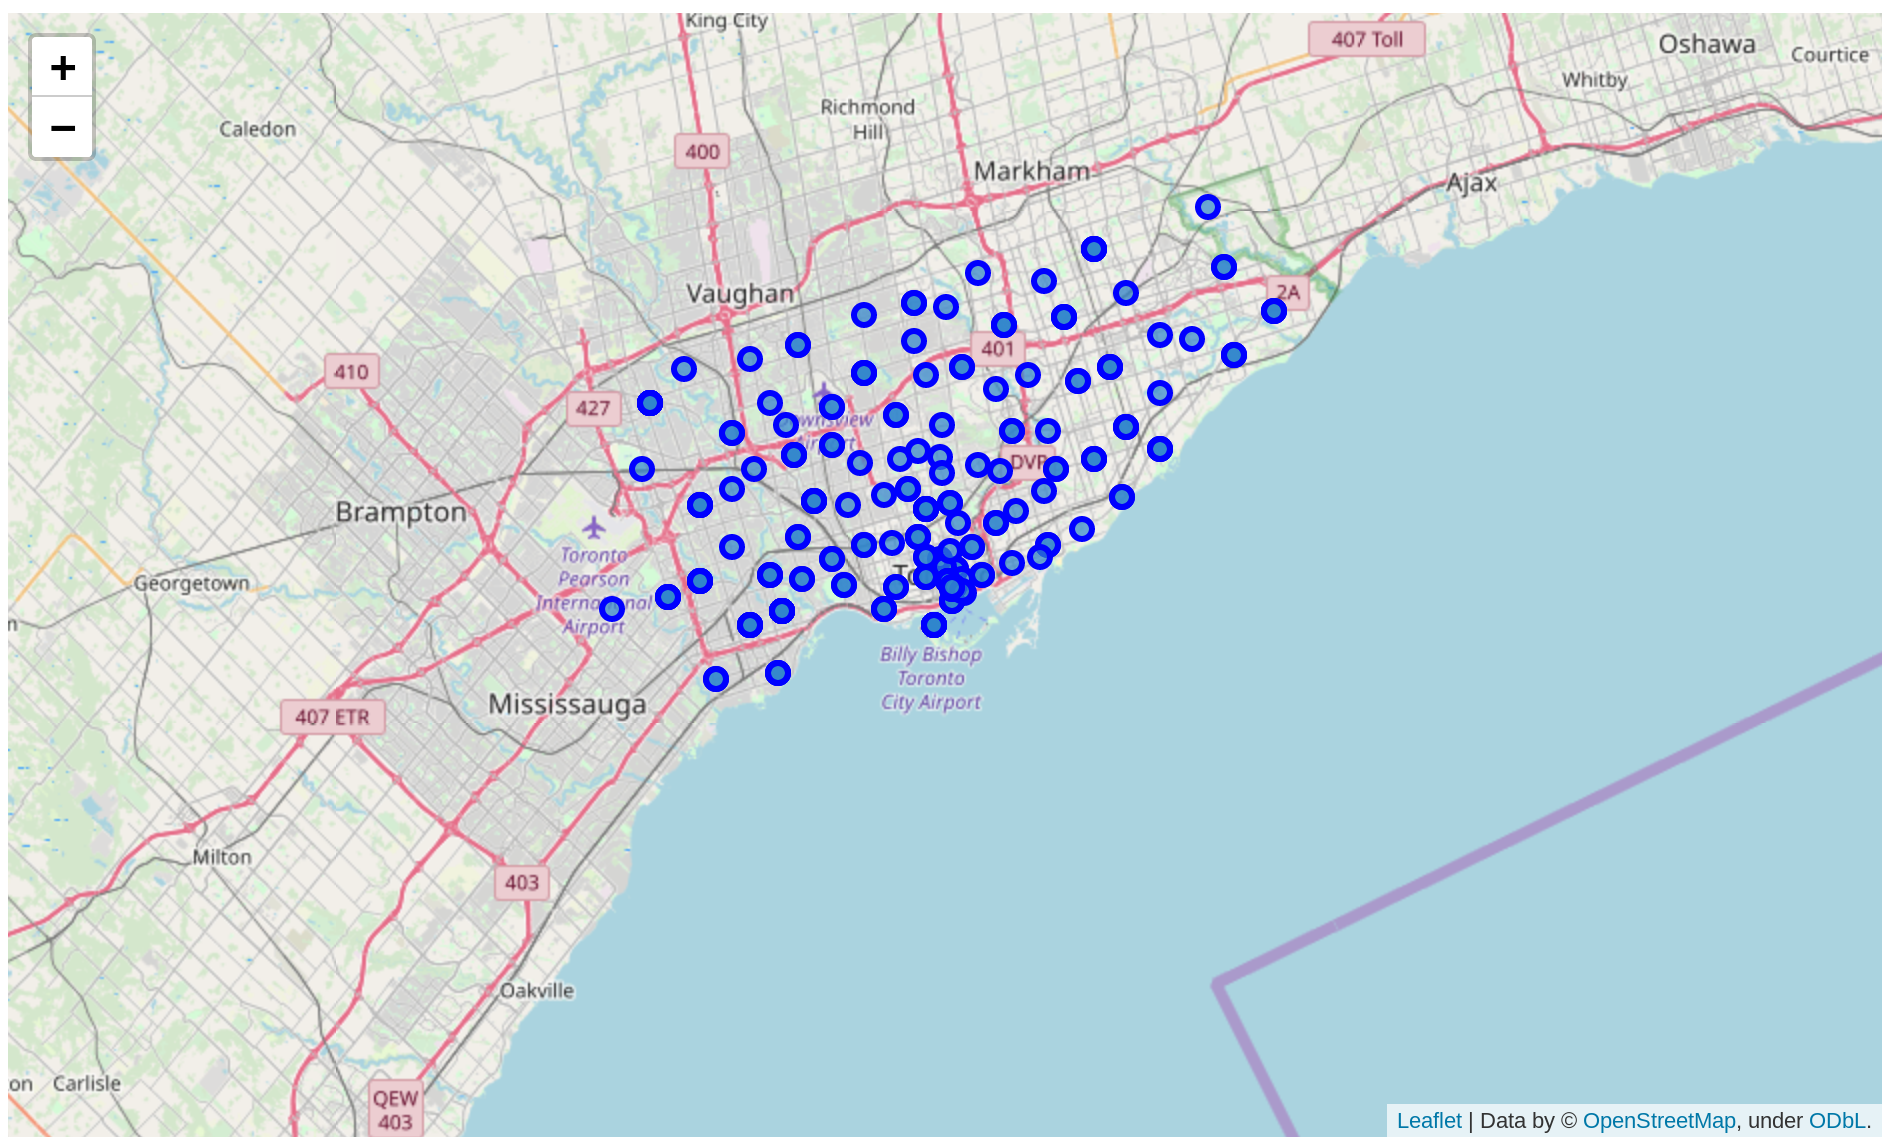